In [151]:
pip list # type: ignore

Package           Version
----------------- -----------
asttokens         2.4.1
colorama          0.4.6
comm              0.2.2
contourpy         1.3.0
cycler            0.12.1
debugpy           1.8.5
decorator         5.1.1
executing         2.1.0
fonttools         4.53.1
ipykernel         6.29.5
ipython           8.27.0
jedi              0.19.1
joblib            1.4.2
jupyter_client    8.6.2
jupyter_core      5.7.2
kiwisolver        1.4.5
matplotlib        3.9.2
matplotlib-inline 0.1.7
nest-asyncio      1.6.0
numpy             1.26.4
packaging         24.1
pandas            2.2.2
parso             0.8.4
pillow            10.4.0
pip               24.2
platformdirs      4.2.2
prompt_toolkit    3.0.47
psutil            6.0.0
pure_eval         0.2.3
Pygments          2.18.0
pyparsing         3.1.4
python-dateutil   2.9.0.post0
pytz              2024.1
pywin32           306
pyzmq             26.2.0
scikit-learn      1.5.1
scikit-surprise   1.1.4
scipy             1.14.1
seaborn           

In [152]:
pip show scikit-learn #type: ignore

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\Arun\anaconda3\envs\condaEnv\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [153]:
import pandas as pd

df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [154]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [156]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [157]:
df = df.dropna(subset=['total_bedrooms'])

In [158]:
df.shape

(20433, 10)

In [159]:
import matplotlib.pyplot as plt
features = list(df.columns)
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [160]:
input_features = features[0:-2]
output_features = features[-2]
#input_features.append(features[-1])
input_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

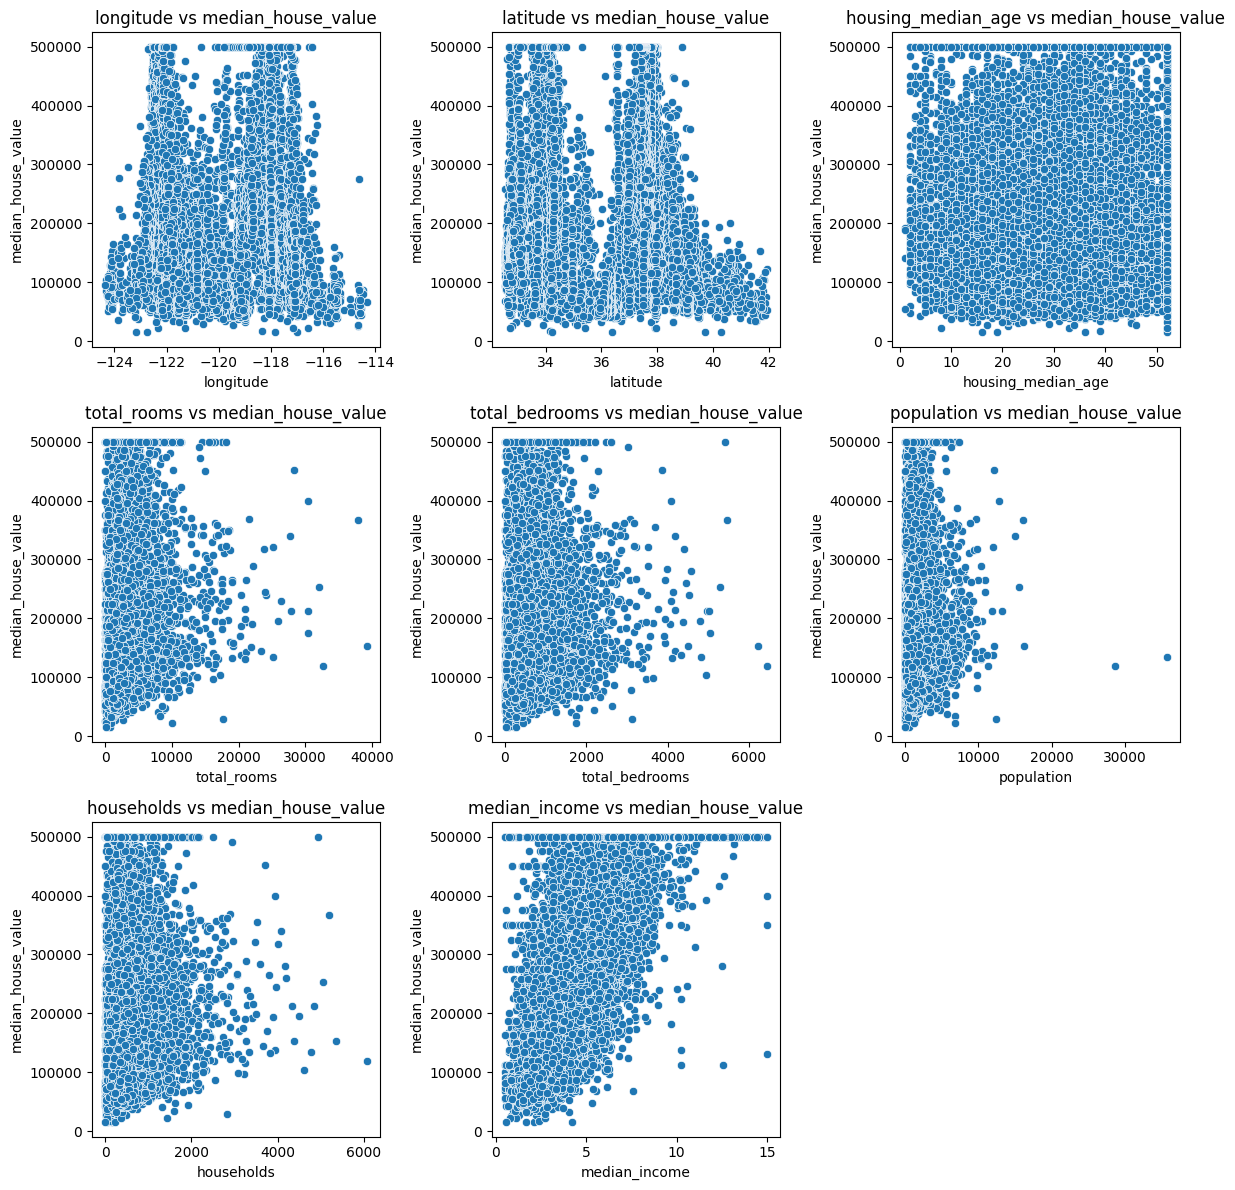

In [161]:
import seaborn as sns
plt.figure(figsize = (12,12))
for i, features in enumerate(input_features):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x = df[features], y = df[output_features])
    plt.title(f'{features} vs {output_features}')
    plt.xlabel(features)
    plt.ylabel(output_features)

plt.tight_layout()
plt.show()

In [162]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit(df[input_features])
scaled_array

StandardScaler()

In [163]:
scaled_array = scaler.transform(df[input_features])
scaled_df = pd.DataFrame(scaled_array, columns=df[input_features].columns)
scaled_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143
...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136


In [164]:
scaled_df['median_house_value'] = df['median_house_value']

In [165]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

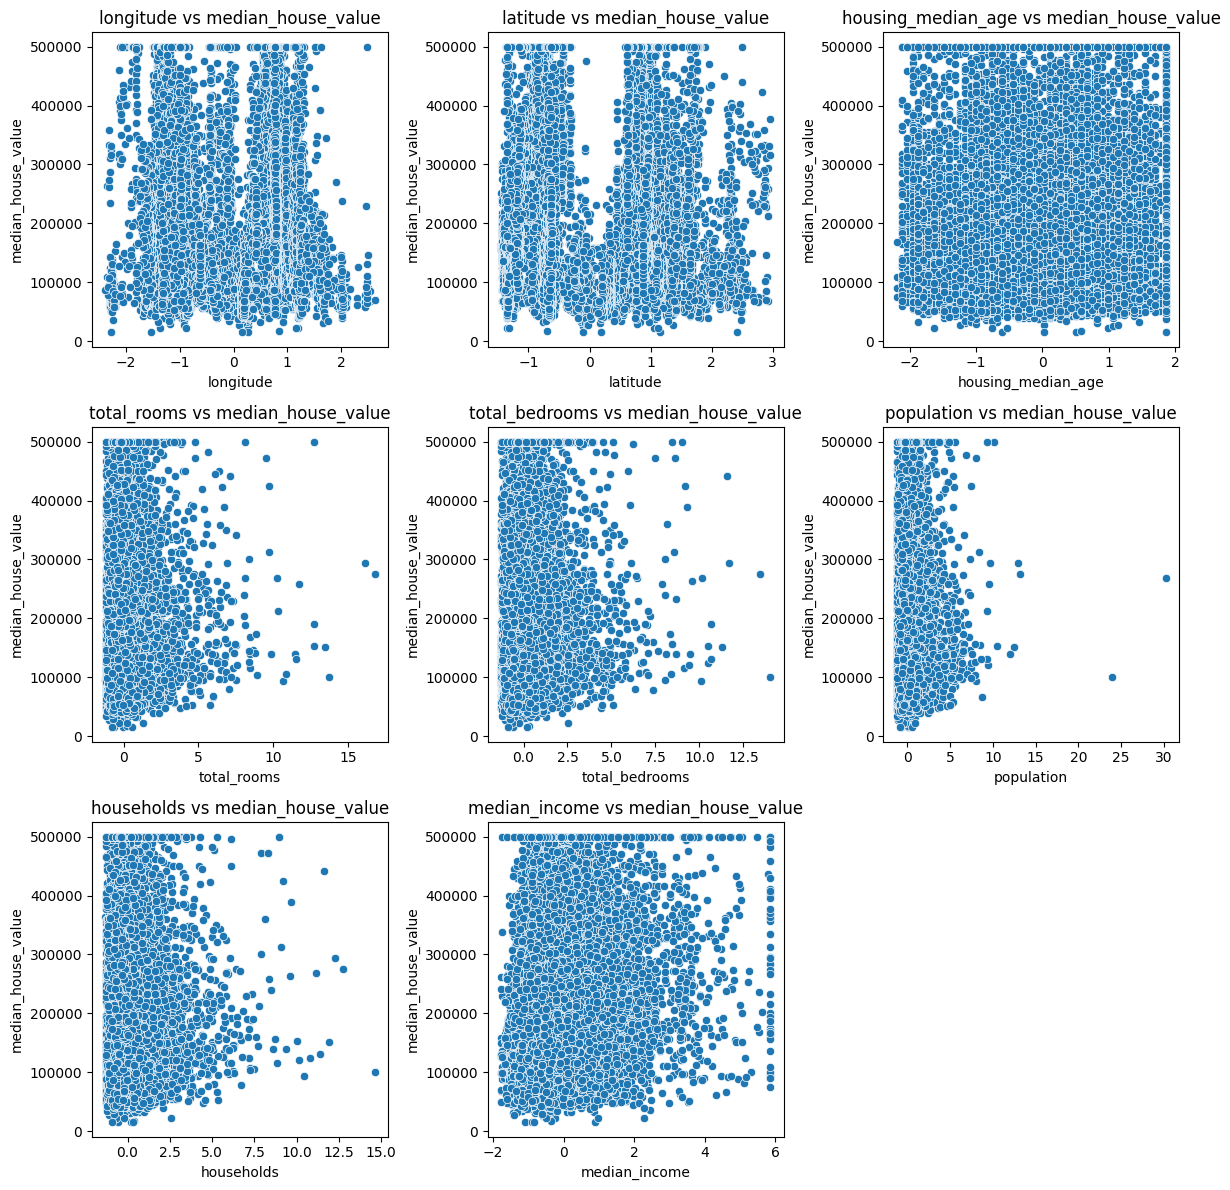

In [166]:
import seaborn as sns
plt.figure(figsize = (12,12))
for i, features in enumerate(input_features):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x = scaled_df[features], y = df[output_features])
    plt.title(f'{features} vs {output_features}')
    plt.xlabel(features)
    plt.ylabel(output_features)

plt.tight_layout()
plt.show()

In [167]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [168]:
ocean_proximity_dict = {}

for index, value in enumerate(df.ocean_proximity.unique()):
    ocean_proximity_dict[value] = index

ocean_proximity_dict 
# ocean_proximity_dict.items()
# data = 'NEAR BAY'
# #if data in ocean_proximity_dict.items():
# for i in ocean_proximity_dict.items():
#     print(i[-1].strip())
#     if i[-1].strip() == data.strip():
#         print(True)
#     else:
#         print(False)
# print(data)

{'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}

In [169]:
# def convert_into_number(data):
#     for i in ocean_proximity_dict.items():
#         if i[-1].strip() == data.strip():
#             data = str(i[0])
#     return data

scaled_df['ocean_proximity'] = df['ocean_proximity'].map(ocean_proximity_dict)
scaled_df 


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,452600.0,0.0
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,358500.0,0.0
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,352100.0,0.0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,341300.0,0.0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,342200.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,425800.0,1.0
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,361900.0,1.0
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,224700.0,1.0
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,282700.0,1.0


In [170]:
ocean_proximity_dict

{'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}

In [171]:
scaled_df[scaled_df['ocean_proximity'] == 1.0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-1.232481,0.944054,-1.479816,2.591275,1.870377,2.119744,2.062745,1.256678,431000.0,1.0
830,-1.232481,0.920649,-0.923885,0.310036,0.237626,0.395394,0.268295,0.271865,217000.0,1.0
859,-1.232481,0.911287,-1.162141,5.619808,5.150117,5.812888,5.510391,0.924862,247600.0,1.0
860,-1.232481,0.906606,-1.320978,1.410614,1.248602,1.774697,1.458492,0.745948,283500.0,1.0
861,-1.247455,0.906606,-1.638653,2.750527,2.062604,3.171650,2.300784,1.416531,216900.0,1.0
...,...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,425800.0,1.0
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,361900.0,1.0
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,224700.0,1.0
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,282700.0,1.0


In [172]:
scaled_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value    205
ocean_proximity       205
dtype: int64

In [173]:
df[df['ocean_proximity'] == '<1H OCEAN'] 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN
20503,-118.75,34.33,27.0,534.0,85.0,243.0,77.0,8.2787,330000.0,<1H OCEAN
20504,-118.73,34.29,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0,<1H OCEAN
20505,-118.72,34.29,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0,<1H OCEAN


In [174]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [175]:
scaled_df[scaled_df.ocean_proximity.isnull() == True]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-1.292375,1.000226,1.538094,-0.759423,-0.816068,-0.863893,-0.835579,0.473682,NaN,NaN
341,-1.307349,0.990864,0.585070,-0.691238,-0.652319,-0.832124,-0.914054,-1.029073,NaN,NaN
538,-1.352270,1.000226,-0.129698,0.622591,1.269961,0.420103,1.220452,-0.063795,NaN,NaN
563,-1.332305,0.995545,1.855769,-0.031807,-0.241758,-0.269990,-0.220862,0.388701,NaN,NaN
696,-1.197543,0.939373,0.267395,-0.619391,-0.816068,-0.829477,-0.859122,1.151109,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
20069,0.170044,-0.684934,-0.844466,1.617458,2.259579,0.652193,1.858711,-0.096702,NaN,NaN
20125,0.274859,-0.642805,0.902745,-0.521003,-0.583496,-0.633568,-0.655088,-0.038837,NaN,NaN
20267,0.404630,-0.642805,-0.209117,-0.323769,-0.581123,-0.315878,-0.469365,0.806973,NaN,NaN
20268,0.409622,-0.642805,-0.209117,-0.397903,-0.647572,-0.339705,-0.652472,0.846409,NaN,NaN


In [176]:
df[df['ocean_proximity'] == 'NEAR BAY'].shape

(2270, 10)

In [177]:
df.iloc[20268]

longitude               -118.75
latitude                  34.26
housing_median_age         26.0
total_rooms              1767.0
total_bedrooms            265.0
population               1040.0
households                250.0
median_income            5.4787
median_house_value     198100.0
ocean_proximity       <1H OCEAN
Name: 20474, dtype: object

In [178]:
scaled_df = scaled_df.dropna(subset=['ocean_proximity'])

In [179]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20228 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20228 non-null  float64
 1   latitude            20228 non-null  float64
 2   housing_median_age  20228 non-null  float64
 3   total_rooms         20228 non-null  float64
 4   total_bedrooms      20228 non-null  float64
 5   population          20228 non-null  float64
 6   households          20228 non-null  float64
 7   median_income       20228 non-null  float64
 8   median_house_value  20228 non-null  float64
 9   ocean_proximity     20228 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


In [180]:
# scaled_df = pd.merge(df, scaled_df, how='inner', on=input_features)
# scaled_df

In [181]:
# for i in range(df.shape[0]):
#     if scaled_df.iloc[i]

In [183]:
scaled_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,452600.0,0.0
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,358500.0,0.0
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,352100.0,0.0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,341300.0,0.0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,342200.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,425800.0,1.0
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,361900.0,1.0
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,224700.0,1.0
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,282700.0,1.0


In [187]:
from sklearn.model_selection import train_test_split
X = scaled_df[input_features]
X['ocean_proximity']  = scaled_df.ocean_proximity
Y = scaled_df['median_house_value']
X

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13360\1784338072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ocean_proximity']  = scaled_df.ocean_proximity


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.0
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.0
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,0.0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.0
...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,1.0
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,1.0
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,1.0
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,1.0


In [188]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20428    425800.0
20429    361900.0
20430    224700.0
20431    282700.0
20432    214700.0
Name: median_house_value, Length: 20228, dtype: float64

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [190]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')
print(f'Shape of y_train: {y_train.shape}')

Shape of X_train: (16182, 9)
Shape of X_test: (4046, 9)
Shape of y_test: (4046,)
Shape of y_train: (16182,)


In [193]:
from sklearn.svm import LinearSVR
regression_model = LinearSVR(epsilon=1.5)

In [194]:
regression_model.fit(X_train, y_train)#type: ignore

LinearSVR(epsilon=1.5)

In [195]:
y_pred = regression_model.predict(X_test)

In [197]:
print(y_pred[:5])
print(y_test[:5])


[36245.4884646  59260.96393444 59579.72320308 57808.03599206
 80667.21554295]
15528    137500.0
12242     77500.0
13863    118200.0
2055      74200.0
16835    450000.0
Name: median_house_value, dtype: float64


In [198]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error is: {mse}')

Mean Squared Error is: 40316451637.37996


In [201]:
from sklearn.svm import SVR
svm_poly_reg = SVR(C=100, epsilon=0.1)

In [202]:
svm_poly_reg.fit(X_train, y_train)

SVR(C=100)

In [203]:
y_pred = svm_poly_reg.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse2}')

Mean Squared Error: 12944077676.980473
